# Assignment_12_Naive_Bayes



#### 1) Prepare a classification model using Navie Bayes for Salary Data

#### Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Salary Data_Train

In [3]:
train = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [4]:
train.shape  #Rows and Columns

(30161, 14)

In [5]:
train.columns # Columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
# Now To Rename Columns 

train.columns = ['Age', 'WC', 'ED', 'EN', 'MS','OC', 'RL', 'RC', 'Sex', 'CG','CL','HW','Nat','Sal']

In [7]:
train.columns # Check Column Names

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [8]:
train.index # rows

RangeIndex(start=0, stop=30161, step=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     30161 non-null  int64 
 1   WC      30161 non-null  object
 2   ED      30161 non-null  object
 3   EN      30161 non-null  int64 
 4   MS      30161 non-null  object
 5   OC      30161 non-null  object
 6   RL      30161 non-null  object
 7   RC      30161 non-null  object
 8   Sex     30161 non-null  object
 9   CG      30161 non-null  int64 
 10  CL      30161 non-null  int64 
 11  HW      30161 non-null  int64 
 12  Nat     30161 non-null  object
 13  Sal     30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
train.describe().T # Here T is For Transformation

,count,mean,std,min,25%,50%,75%,max
Age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
EN,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
CG,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
CL,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
HW,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [11]:
# Now For Checking Null Values But There is No Null values present in Given Dataset
train.isna().sum()

Age    0
WC     0
ED     0
EN     0
MS     0
OC     0
RL     0
RC     0
Sex    0
CG     0
CL     0
HW     0
Nat    0
Sal    0
dtype: int64

In [12]:
train['Sal'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
train['Sal'].value_counts()

 <=50K    22653
 >50K      7508
Name: Sal, dtype: int64

In [14]:
# For Checking Duplicate Values
train[train.duplicated()]

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [15]:
# For Checking Correlation between Numerical Function
train.corr()

,Age,EN,CG,CL,HW
Age,1.000000,0.043525,0.080152,0.060278,0.101598
EN,0.043525,1.000000,0.124416,0.079691,0.152522
CG,0.080152,0.124416,1.000000,-0.032218,0.080431
CL,0.060278,0.079691,-0.032218,1.000000,0.052454
HW,0.101598,0.152522,0.080431,0.052454,1.000000


In [16]:
# Correlation Without Droping Duplicated Rows
df = train.drop_duplicates()
df.head()

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
# Correlation with Droping Duplicated Rows

corr= df.corr()

# Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

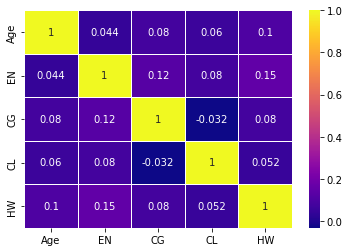

In [19]:
sns.heatmap(train.corr(), annot = True, linewidths = 0.5, cmap = 'plasma')

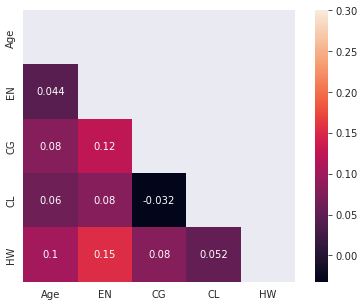

In [20]:
corr = train.corr() 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
     f, ax = plt.subplots(figsize=(7, 5))
     ax= sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

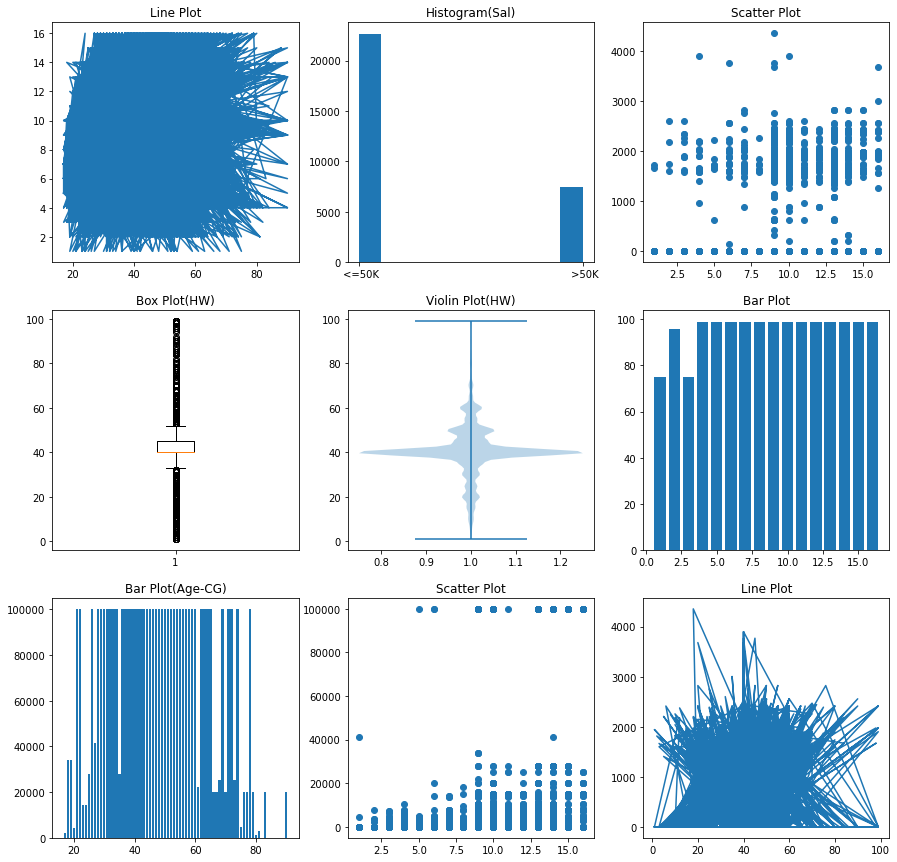

In [21]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Age','EN', data = train);ax[0,0].set_title("Line Plot")
ax[0,1].hist('Sal', data = train);ax[0,1].set_title("Histogram(Sal)")
ax[0,2].scatter('EN', 'CL', data = train);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('HW', data = train);ax[1,0].set_title("Box Plot(HW)")
ax[1,1].violinplot('HW', data = train);ax[1,1].set_title("Violin Plot(HW)")
ax[1,2].bar('EN','HW', data = train);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(train['Age'], train["CG"]);ax[2,0].set_title("Bar Plot(Age-CG)")
ax[2,1].scatter('EN','CG', data = train);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('HW','CL', data = train);ax[2,2].set_title("Line Plot")
plt.show()

In [22]:
import seaborn as sns

In [23]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


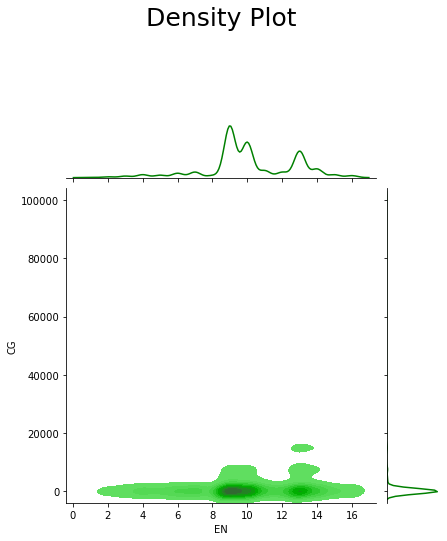

In [24]:
# Density Plot
sns.jointplot(x = 'EN',y='CG', data = train, kind='kde', shade = True, color = 'green')
plt.title("Density Plot", size = 25, y=1.5)
plt.show()

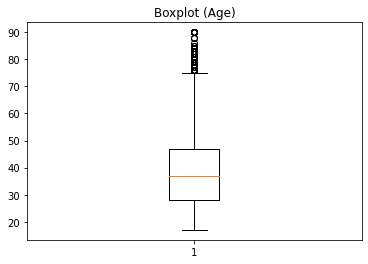

In [25]:
# Boxplot for outlier detection
plt.boxplot(train['Age']); plt.title("Boxplot (Age)")
plt.show()

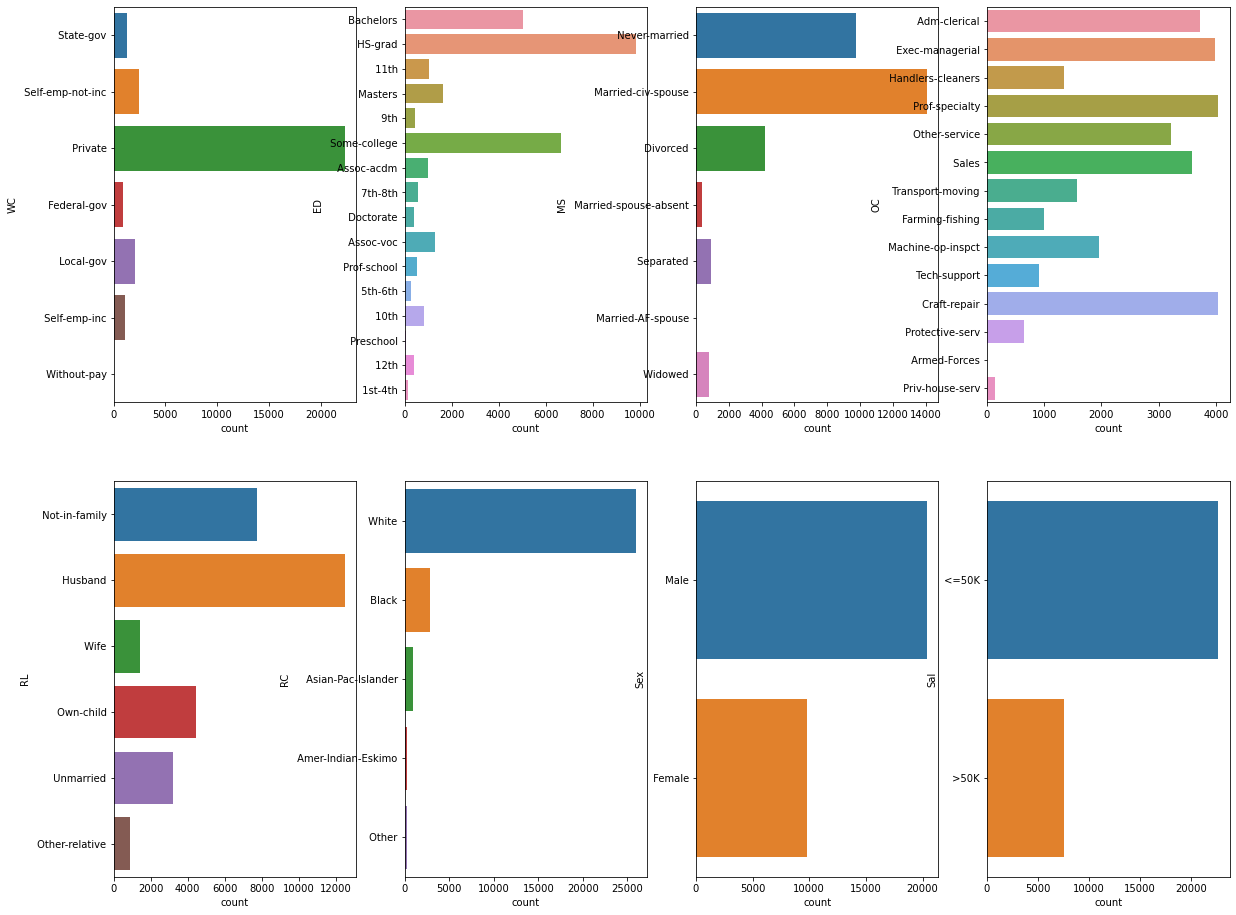

In [26]:
# Now Plloting Countolot for Categorical data

plt.subplots(figsize=(20,16))
[plt.subplot(2,4,1), sns.countplot(data=train, y='WC')];

[plt.subplot(2,4,2), sns.countplot(data=train, y='ED')];

[plt.subplot(2,4,3), sns.countplot(data=train, y='MS')];

[plt.subplot(2,4,4), sns.countplot(data=train, y='OC')];

[plt.subplot(2,4,5), sns.countplot(data=train, y='RL')];

[plt.subplot(2,4,6), sns.countplot(data=train, y='RC')];

[plt.subplot(2,4,7), sns.countplot(data=train, y='Sex')];

[plt.subplot(2,4,8), sns.countplot(data=train, y='Sal')];

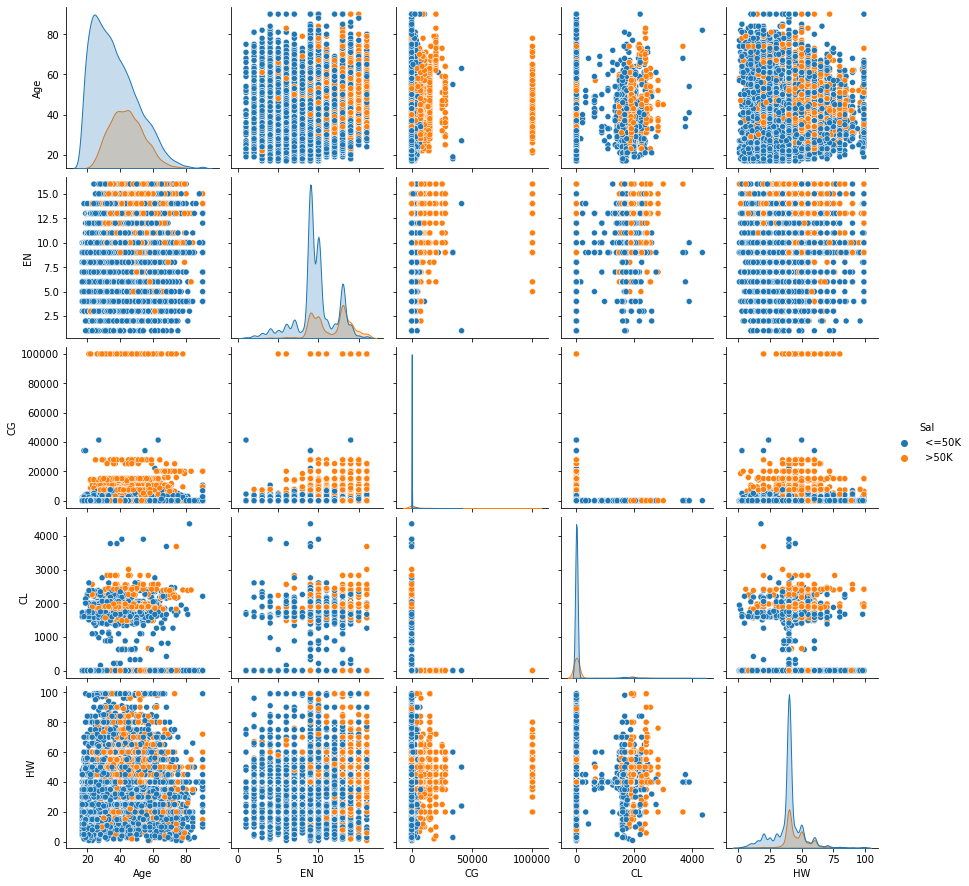

In [27]:
# Now Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(train, hue = 'Sal')
plt.show()

# KDE PLOT

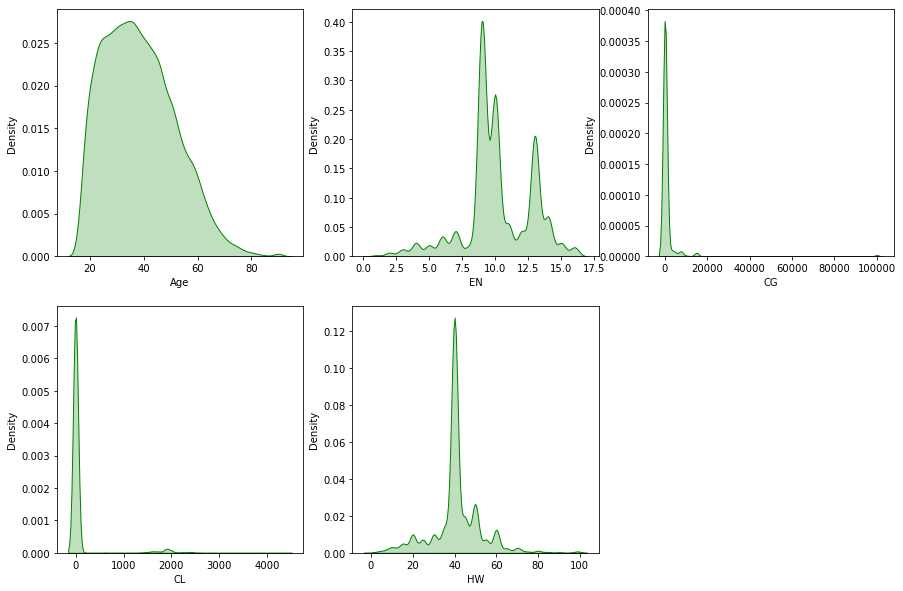

In [28]:
# Kde Plot for numerical columns/ data
no_columns = train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(15,10))
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(train[column],color='g',shade=True)

# Naive Bayes

In [29]:
# For Converting Salary Column string To Integer
# For Converting Categorical data into Numeric Using label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [30]:
train.columns

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [31]:
col = ['Age','WC', 'ED', 'MS', 'OC', 'RL', 'RC', 'Sex', 'Nat', 'Sal']
for i in col:
    df[i] = LE.fit_transform(df[i])
df

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


# Importing Test Dataset Salary

# SalaryData_Train

In [32]:
test = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\SalaryData_Train (1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [33]:
test.shape

(30161, 14)

In [34]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [35]:
test.columns = ['Age', 'WC', 'ED', 'EN', 'MS',
       'OC', 'RL', 'RC', 'Sex', 'CG',
       'CL', 'HW', 'Nat', 'Sal']

In [36]:
test.columns

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [37]:
test.index

RangeIndex(start=0, stop=30161, step=1)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     30161 non-null  int64 
 1   WC      30161 non-null  object
 2   ED      30161 non-null  object
 3   EN      30161 non-null  int64 
 4   MS      30161 non-null  object
 5   OC      30161 non-null  object
 6   RL      30161 non-null  object
 7   RC      30161 non-null  object
 8   Sex     30161 non-null  object
 9   CG      30161 non-null  int64 
 10  CL      30161 non-null  int64 
 11  HW      30161 non-null  int64 
 12  Nat     30161 non-null  object
 13  Sal     30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [39]:
test.describe()

,Age,EN,CG,CL,HW
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [40]:
test.isna().sum()

Age    0
WC     0
ED     0
EN     0
MS     0
OC     0
RL     0
RC     0
Sex    0
CG     0
CL     0
HW     0
Nat    0
Sal    0
dtype: int64

In [41]:
test[test.duplicated()]

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [42]:
# Correlation
# Checking Correlation between numerical function
corr = test.corr()  ## correlation without droping duplicated raws
corr

,Age,EN,CG,CL,HW
Age,1.000000,0.043525,0.080152,0.060278,0.101598
EN,0.043525,1.000000,0.124416,0.079691,0.152522
CG,0.080152,0.124416,1.000000,-0.032218,0.080431
CL,0.060278,0.079691,-0.032218,1.000000,0.052454
HW,0.101598,0.152522,0.080431,0.052454,1.000000


<AxesSubplot:>

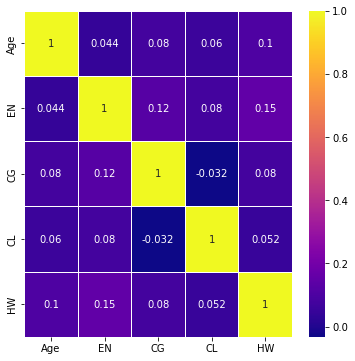

In [43]:
# Now creating heatmap by use of correlation
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot = True,  linewidths = 0.5, cmap = 'plasma' )

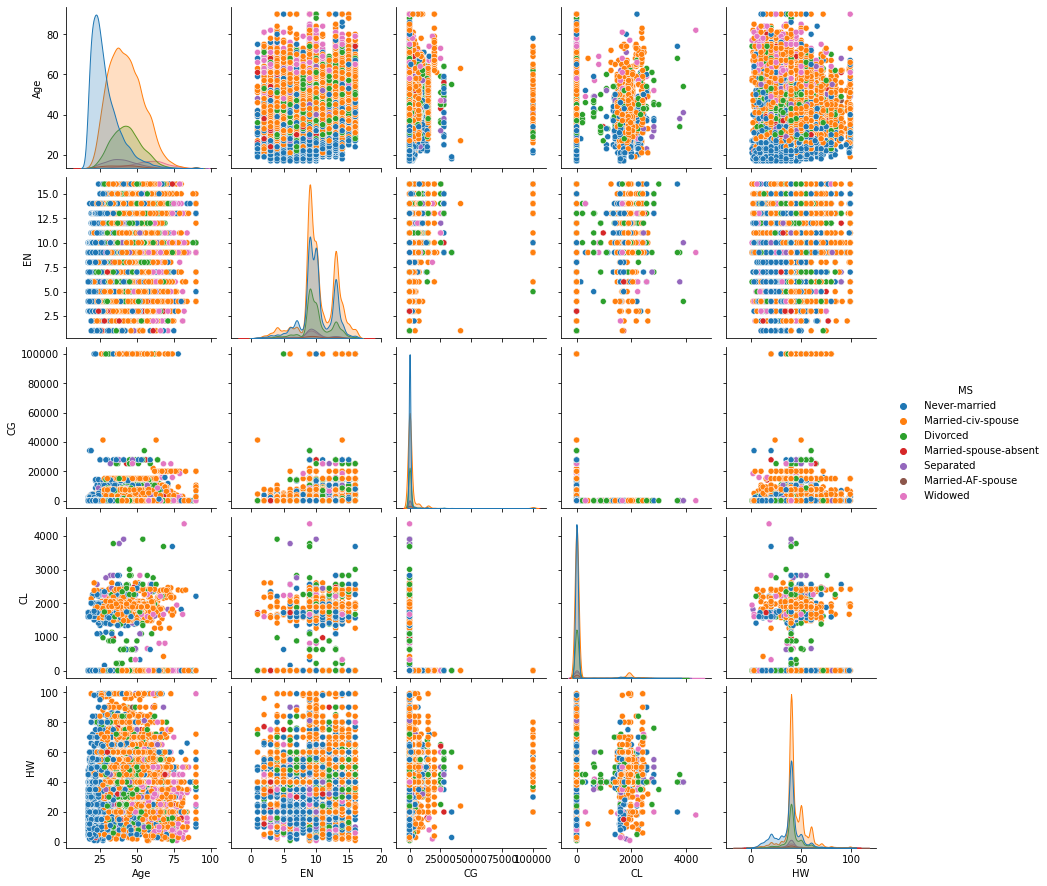

In [44]:
sns.pairplot(test, hue = 'MS')
plt.show()

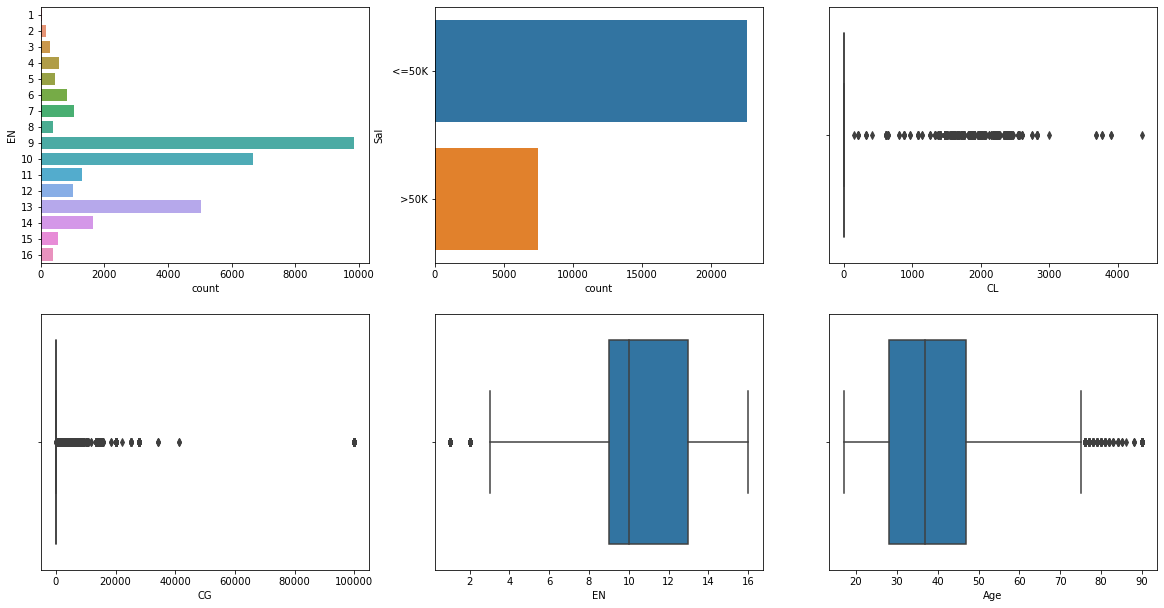

In [45]:
plt.subplots(figsize=(20,16))
[plt.subplot(3,3,1), sns.countplot(data=test, y='EN')];

[plt.subplot(3,3,2), sns.countplot(data=test, y='Sal')];

[plt.subplot(3,3,3), sns.boxplot(x=test["CL"])];  #Ploting Boplot for numerical data

[plt.subplot(3,3,4), sns.boxplot(x=test["CG"])];

[plt.subplot(3,3,5), sns.boxplot(x=test["EN"])];

[plt.subplot(3,3,6), sns.boxplot(x=test["Age"])];

In [46]:
df2 = test.drop_duplicates()
df2

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [47]:
col = ['Age', 'WC','ED', 'MS', 'OC', 'RL', 'RC', 'Sex', 'Nat', 'Sal']
for i in col:
    df2[i] = LE.fit_transform(df2[i])
df2

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


# Applying Now Naive Bayes

In [96]:
x_train = df.iloc[:,:13]
y_train = df.iloc[:,13]
x_test = df2.iloc[:,:13]
y_test = df2.iloc[:,13]

# 1. Gaussian NB

In [97]:
from sklearn.naive_bayes import GaussianNB
clsfrgnb = GaussianNB()

In [98]:
# Model Making
model1 = clsfrgnb.fit(x_train, y_train)

In [99]:
# Prediction with x_test
y_pred_gnb = model1.predict(x_test)

In [100]:
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 1])

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gnb)

array([[18941,  1082],
       [ 4477,  2403]], dtype=int64)

In [102]:
((10056+1180)/(10056+564+2330+1180))*100

79.51875442321303

In [103]:
pd.crosstab(y_test.values.flatten(), clsfrgnb)

col_0,GaussianNB()
row_0,
0,20023
1,6880


In [104]:
print("Accuracy is : ", np.mean(y_pred_gnb == y_test.values.flatten())*100)

Accuracy is :  79.33687692822362


# 2. MultinomialNB

In [105]:
from sklearn.naive_bayes import MultinomialNB
clsfrmnb = MultinomialNB()

In [106]:
model2 = clsfrmnb.fit(x_train, y_train)

#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. #On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [107]:
y_pred_mnb = model2.predict(x_test)

In [108]:
# Now For Confusion matrix
confusion_matrix(y_test, y_pred_mnb)

array([[19088,   935],
       [ 5298,  1582]], dtype=int64)

In [109]:
((10151+777)/(10151+469+2733+777))*100

77.33899504600141

In [110]:
pd.crosstab(y_test.values.flatten(), clsfrmnb)

col_0,MultinomialNB()
row_0,
0,20023
1,6880


In [111]:
print("Accuracy is : ", np.mean(y_pred_mnb == y_test.values.flatten()))

Accuracy is :  0.7683158012117608


In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, y_pred_mnb)

0.7683158012117608

# 3. Cross Validation Check

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression

In [115]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))

In [116]:
results = []
names = []
scoring = 'accuracy'

In [117]:
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798721 (0.006956)
KNN: 0.824963 (0.010701)
CART: 0.790135 (0.006954)
NB: 0.793703 (0.010001)
MNB: 0.768316 (0.008122)


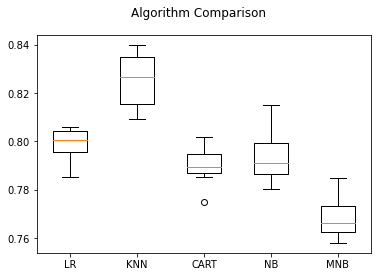

In [118]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()